# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, dinner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
# 1.

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 1', tips)

In [4]:
modelo_a = sm.OLS(y,X).fit()

modelo_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.64e-20
Time:                        16:02:41   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# 2. Percebemos que as variáveis 'sex', 'smoker' e 'time' possuem P-value > 0.05 por isso serão removidas do modelo

modelo_b = smf.ols('tip ~ net_bill + 1', tips).fit()

modelo_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.02e-23
Time:                        16:02:42   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

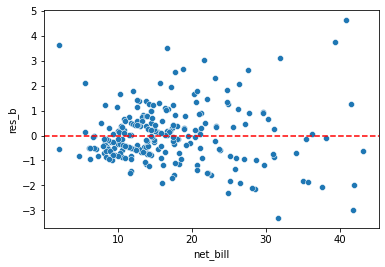

In [6]:
# 3.

tips['res_b'] = modelo_b.resid

sns.scatterplot(x = 'net_bill', y = 'res_b', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [7]:
# 4. log

modelo_c = smf.ols('tip ~ np.log(net_bill) + 1', tips).fit()

modelo_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           4.40e-20
Time:                        16:02:44   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

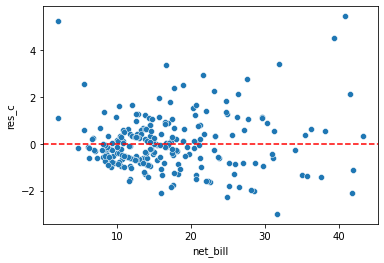

In [8]:
tips['res_c'] = modelo_c.resid

sns.scatterplot(x = 'net_bill', y = 'res_c', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [9]:
# Polinômio (aqui escolheremos uma função de segundo grau)

modelo_d = smf.ols('tip ~ net_bill + I(net_bill**2) + 1', tips).fit()

modelo_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           4.96e-22
Time:                        16:02:45   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353      3.039      0.003       0.378       1.770
net_bill             0.1288      0.037      3.493      0.001       0.056       0.202
I(net_bill ** 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

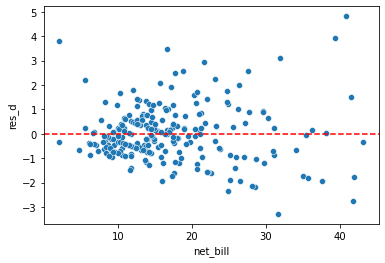

In [10]:
tips['res_d'] = modelo_d.resid

sns.scatterplot(x = 'net_bill', y = 'res_d', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Conclusão Item 1.4.:** Acredito que o melhor modelo seja o da regressão linear (o primeiro), a regressão com log retornou um valor de R² inferior a do primeiro modelo e na regressão com um polinômio de segundo grau o termo quadrático da equação possui P-value > 0.05 indicando que o termo não é estatisticamente relevante.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, dinner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
# 1.

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill + 1', tips)

In [12]:
modelo_e = sm.OLS(y,X).fit()

modelo_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.21e-18
Time:                        16:02:48   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# 2. Novamente percebemos que as variáveis 'sex', 'smoker' e 'time' possuem P-value > 0.05 por isso serão removidas do modelo

modelo_f = smf.ols('np.log(tip) ~ net_bill + 1', tips).fit()

modelo_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.60e-21
Time:                        16:02:49   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

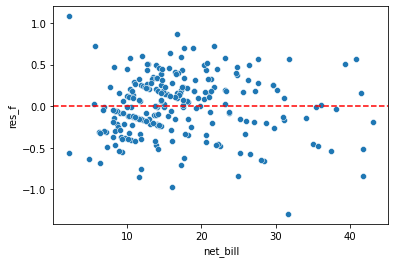

In [14]:
# 3.

tips['res_f'] = modelo_f.resid

sns.scatterplot(x = 'net_bill', y = 'res_f', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [15]:
# 4. log

modelo_g = smf.ols('np.log(tip) ~ np.log(net_bill) + 1', tips).fit()

modelo_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           5.62e-22
Time:                        16:02:52   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

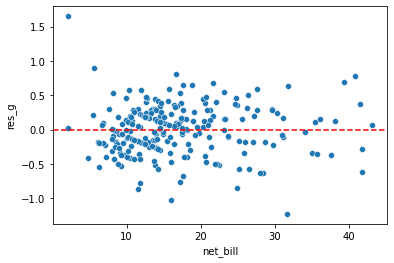

In [16]:
tips['res_g'] = modelo_g.resid

sns.scatterplot(x = 'net_bill', y = 'res_g', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
# Polinômio (aqui escolheremos uma função de segundo grau)

modelo_h = smf.ols('np.log(tip) ~ net_bill + I(net_bill**2) + 1', tips).fit()

modelo_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.82e-22
Time:                        16:02:54   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill             0.0655      0.012      5.642      0.000       0.043       0.088
I(net_bill ** 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

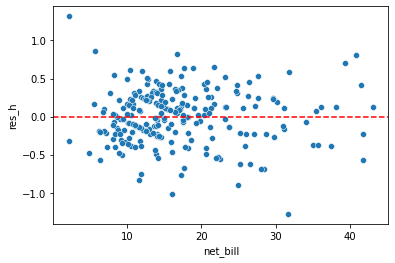

In [18]:
tips['res_h'] = modelo_h.resid

sns.scatterplot(x = 'net_bill', y = 'res_h', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
# Polinômio (como P-value do termo de segundo grau deu menor que 0.05 adicionarei um termo de terceiro grau)

modelo_i = smf.ols('np.log(tip) ~ net_bill + I(net_bill**2) + I(net_bill**3) + 1', tips).fit()

modelo_i.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     41.15
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.72e-21
Time:                        16:02:55   Log-Likelihood:                -92.636
No. Observations:                 244   AIC:                             193.3
Df Residuals:                     240   BIC:                             207.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0384      0.204      0.188      0.851      -0.364       0.441
net_bill             0.0931      0.034      2.773      0.006       0.027       0.159
I(net_bill ** 2)    -0.0023      0.002     -1.362      0.174      -0.006       0.001
I(net_bill ** 3)  2.152e-05   2.45e-05      0.877      0.381   -2.68e-05    6.98e-05
==============================================================================
Omnibus:                        6.882   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               11.248
Skew:                          -0.033   Prob(JB):                      0.00361
Kurtosis:                       4.050   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

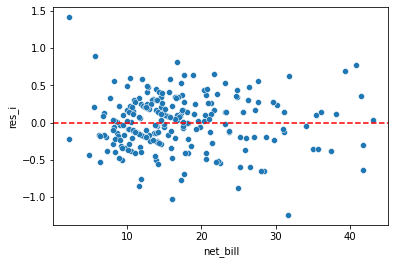

In [20]:
tips['res_i'] = modelo_i.resid

sns.scatterplot(x = 'net_bill', y = 'res_i', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Conclusão Item 2.4.:** Eu escolheria o modelo que utiliza polinômio de segundo grau, possui um R² de 0.338 (maior do que da regressão linear e da regressão com log) e os termos dos modelo possuem P-value < 0.05 o que não ocorre no polinômio de terceiro grau por exemplo.

In [21]:
# 5. Calculo R²

tips['pred_h'] = modelo_h.fittedvalues

r = tips[['pred_h', 'tip']].corr().iloc[0,1]

r**2

0.3197192113607719

**Conclusão Item 2.5.:** O modelo que possui melhor valor de R² entre os dois escolhidos como melhores nos exercícios 1 e 2 é o da regressão linear do primeiro exercício (0.333 > 0.319).

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [22]:
# Carregando a base

renda_raw = pd.read_csv('previsao_de_renda.csv')
renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [24]:
renda_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [29]:
# Observamos que a variável tempo_emprego possui varios dados faltantes, iremos remove-los

renda_a = renda_raw.dropna()

In [30]:
renda_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             12466 non-null  int64  
 1   data_ref               12466 non-null  object 
 2   index                  12466 non-null  int64  
 3   sexo                   12466 non-null  object 
 4   posse_de_veiculo       12466 non-null  bool   
 5   posse_de_imovel        12466 non-null  bool   
 6   qtd_filhos             12466 non-null  int64  
 7   tipo_renda             12466 non-null  object 
 8   educacao               12466 non-null  object 
 9   estado_civil           12466 non-null  object 
 10  tipo_residencia        12466 non-null  object 
 11  idade                  12466 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  12466 non-null  float64
 14  mau                    12466 non-null  bool   
 15  re

In [31]:
# 1.

modelo_j = smf.ols('renda ~ tempo_emprego + 1', renda_a).fit()

modelo_j.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:10:16   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

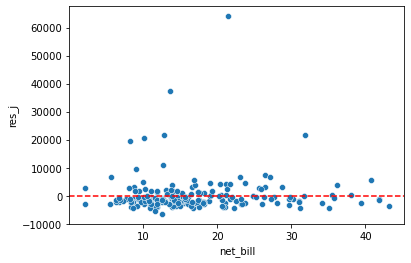

In [32]:
# 2.

tips['res_j'] = modelo_j.resid

sns.scatterplot(x = 'net_bill', y = 'res_j', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Discussão:** Para tentar melhorar o modelo podemos fazer algumas tentativas de utilizar log na variável resposta ou na variável explicativa, assim como tentar utilizar um polinomio da variável explicativa, irei apenas fazer uma regressão log e uma de segunda ordem para a variável explicativa para ver se o R² aumenta.

In [44]:
modelo_k = smf.ols('renda ~ np.log(tempo_emprego) + 1', renda_a).fit()

modelo_k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          7.66e-236
Time:                        16:54:46   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.1692     78.783     33.156      0.000    2457.742    2766.597
np.log(tempo_emprego)  1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
modelo_l = smf.ols('renda ~ tempo_emprego + I(tempo_emprego**2) + 1', renda_a).fit()

modelo_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     1258.
Date:                Tue, 26 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:55:16   Log-Likelihood:            -1.2240e+05
No. Observations:               12466   AIC:                         2.448e+05
Df Residuals:                   12463   BIC:                         2.448e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              3407.0877     81.730     41.687      0.000    3246.885    3567.291
tempo_emprego            87.0286     15.488      5.619      0.000      56.669     117.388
I(tempo_emprego ** 2)     7.2469      0.529     13.699      0.000       6.210       8.284
==============================================================================
Omnibus:                     9723.560   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345767.284
Skew:                           3.454   Prob(JB):                         0.00
Kurtosis:                      27.859   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Comentário:** Só de utilizar um polinômio de segundo grau já conseguimos aumentar o R²

In [51]:
# 3. Utilizando a maioria das outras variáveis

modelo_m = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia + 1', renda_a).fit()

modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     41.98
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          7.31e-182
Time:                        17:14:27   Log-Likelihood:            -1.2308e+05
No. Observations:               12466   AIC:                         2.462e+05
Df Residuals:                   12442   BIC:                         2.464e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          333.2532   1827.667      0.182      0.855   -3249.257    3915.763
sexo[T.M]                         1977.7898     95.748     20.656      0.000    1790.109    2165.471
posse_de_veiculo[T.True]          -189.4765     92.409     -2.050      0.040    -370.613      -8.340
posse_de_imovel[T.True]            227.7823     91.003      2.503      0.012      49.403     406.161
tipo_renda[T.Bolsista]            -807.4402   2352.098     -0.343      0.731   -5417.916    3803.036
tipo_renda[T.Empresário]           717.5921     98.136      7.312      0.000     525.230     909.954
tipo_renda[T.Pensionista]         1260.1355   1568.487      0.803      0.422   -1814.341    4334.612
tipo_renda[T.Servidor público]    1174.3904    141.466      8.302      0.000     897.095    1451.686
educacao[T.Pós graduação]         1922.4438   1179.742      1.630      0.103    -390.034    4234.921
educacao[T.Secundário]             201.6530    477.652      0.422      0.673    -734.618    1137.924
educacao[T.Superior completo]      815.0769    479.639      1.699      0.089    -125.090    1755.244
educacao[T.Superior incompleto]    321.9429    513.789      0.627      0.531    -685.163    1329.049
estado_civil[T.Separado]          -835.0814    879.616     -0.949      0.342   -2559.265     889.102
estado_civil[T.Solteiro]          -371.1568    863.557     -0.430      0.667   -2063.862    1321.548
estado_civil[T.União]              -45.0947    156.878     -0.287      0.774    -352.600     262.411
estado_civil[T.Viúvo]            -1424.8048    903.037     -1.578      0.115   -3194.897     345.287
tipo_residencia[T.Casa]             43.0314    358.511      0.120      0.904    -659.706     745.769
tipo_residencia[T.Com os pais]    -407.8150    402.097     -1.014      0.310   -1195.987     380.357
tipo_residencia[T.Comunitário]    -530.0867    691.946     -0.766      0.444   -1886.408     826.235
tipo_residencia[T.Estúdio]        -165.6388    597.049     -0.277      0.781   -1335.948    1004.670
tipo_residencia[T.Governamental]  -525.7375    433.469     -1.213      0.225   -1375.404     323.929
qtd_filhos                         664.0868    861.239      0.771      0.441   -1024.074    2352.248
idade                               99.0691      5.013     19.762      0.000      89.242     108.896
qt_pessoas_residencia             -542.0817    859.626     -0.631      0.528   -2227.082    1142.918
==============================================================================
Omnibus:                    10569.771   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           465680.358
Skew:                           3.858   Prob(JB):                         0.00
Kurtosis:                      31.931   

In [48]:
# 4. Pelo P-value já concluimos que podemos retirar alguma variáveis tais como: educacao, estado_civil, tipo_residencia,
# posse_veiculo, qtd_filhos e qt_pessoas_residencia

modelo_n = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + idade + 1', renda_a).fit()

modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     110.2
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          1.38e-178
Time:                        17:05:35   Log-Likelihood:            -1.2312e+05
No. Observations:               12466   AIC:                         2.463e+05
Df Residuals:                   12457   BIC:                         2.463e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        -91.7814    208.270     -0.441      0.659    -500.023     316.460
sexo[T.M]                       1972.2171     94.842     20.795      0.000    1786.313    2158.122
posse_de_veiculo[T.True]        -111.6216     91.396     -1.221      0.222    -290.771      67.528
posse_de_imovel[T.True]          319.9011     88.922      3.598      0.000     145.599     494.203
tipo_renda[T.Bolsista]          -321.2134   2356.951     -0.136      0.892   -4941.201    4298.774
tipo_renda[T.Empresário]         782.1045     97.801      7.997      0.000     590.400     973.809
tipo_renda[T.Pensionista]       1619.7738   1571.442      1.031      0.303   -1460.496    4700.044
tipo_renda[T.Servidor público]  1269.0649    140.697      9.020      0.000     993.276    1544.853
idade                             91.6305      4.577     20.021      0.000      82.659     100.602
==============================================================================
Omnibus:                    10568.266   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           461116.733
Skew:                           3.861   Prob(JB):                         0.00
Kurtosis:                      31.777   Cond. No.                     2.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Análise:** O P-value sugere que podemos continuar retirando variáveis, porém já notamos que o R² é muito inferior ao do modelo que utiliza a variável explicativa tempo_emprego.

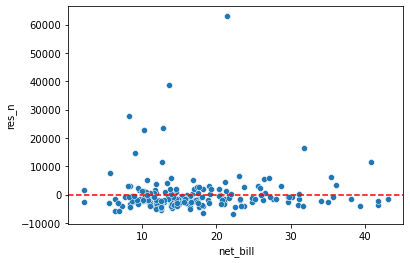

In [49]:
# 5. Análise dos resíduos

tips['res_n'] = modelo_n.resid

sns.scatterplot(x = 'net_bill', y = 'res_n', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Análise:** O gráfico de resíduos demonstra alguns Outliers, utilizando outros parâmetros na regressão podemos amortizar o efeito desses Outliers. O ajuste em si retornou um R² baixo. Concluimos que a variável com maior impacto/utilidade em um modelo para prever a renda é a variável explicativa tempo_emprego.